In [53]:
import np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from math import floor, ceil

In [54]:
logs = []
for filename in glob("logs/*.txt"):
    print(filename)
    with open(filename) as logfile:
        log = pd.DataFrame(list(map(eval, logfile.readlines())))
        logs.append(log)

logs[0]

logs\roberta_noisy_layerdrop_0.0.txt
logs\roberta_noisy_layerdrop_0.2.txt
logs\roberta_noisy_layerdrop_0.5.txt
logs\roberta_noisy_layerdrop_0.7.txt


,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.8039,1.919420e-05,0.20,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.7533,1.838840e-05,0.40,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6313,1.758259e-05,0.60,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5927,1.677679e-05,0.81,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.00,2482,0.548047,0.723384,0.691889,0.723384,0.694317,0.510690,50.0587,170.000,21.255,NaN,NaN,NaN,NaN,NaN
5,0.5822,1.597099e-05,1.01,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.5139,1.516519e-05,1.21,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.4811,1.435939e-05,1.41,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.4720,1.355359e-05,1.61,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.4719,1.274778e-05,1.81,4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def plot(model, ld):
    modelLoss = model[~model.loss.isna()].reset_index()[["loss", "learning_rate", "epoch", "step"]]
    modelTrain = model[model.loss.isna()].iloc[-1].dropna().drop(("epoch")).drop("step").to_dict()
    modelEval = model[model.loss.isna()].iloc[:-1].reset_index().drop(columns=["index", "loss", "learning_rate", "step", "train_runtime", "train_samples_per_second", "train_steps_per_second", "total_flos", "train_loss"])
    modelEval.epoch = modelEval.epoch.astype(int)
    modelEval = modelEval.set_index("epoch")
    ax = modelLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", title=f"Loss Curve of RoBERTa Noisy Student (LayerDrop={ld}) Model", legend=False, xlim=(0,5))
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    #colors = ["#003049", "#D62828", "#FF7F00", "#FCBF49", "#EAE2B7"]
    #colors = ["#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300"]
    for epoch, color in zip(range(5), colors):
        ax.axvspan(epoch, epoch+1, alpha=0.5, color=color)
    return modelLoss, modelTrain, modelEval

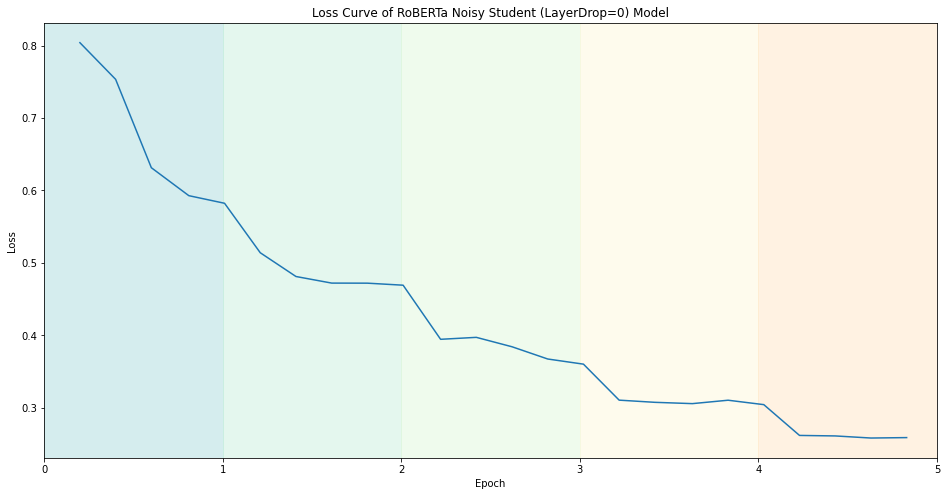

In [56]:
rob1Loss, rob1Train, rob1Eval = plot(logs[0], 0)

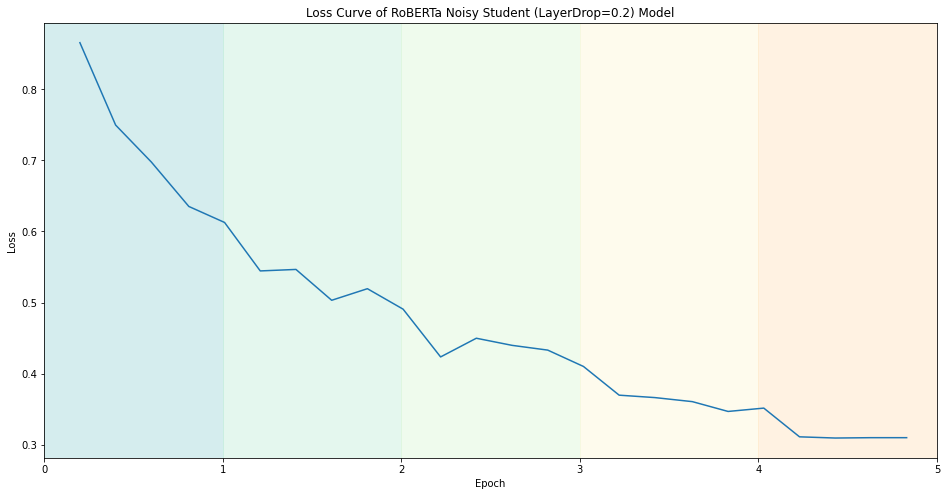

In [57]:
rob2Loss, rob2Train, rob2Eval = plot(logs[1], 0.2)

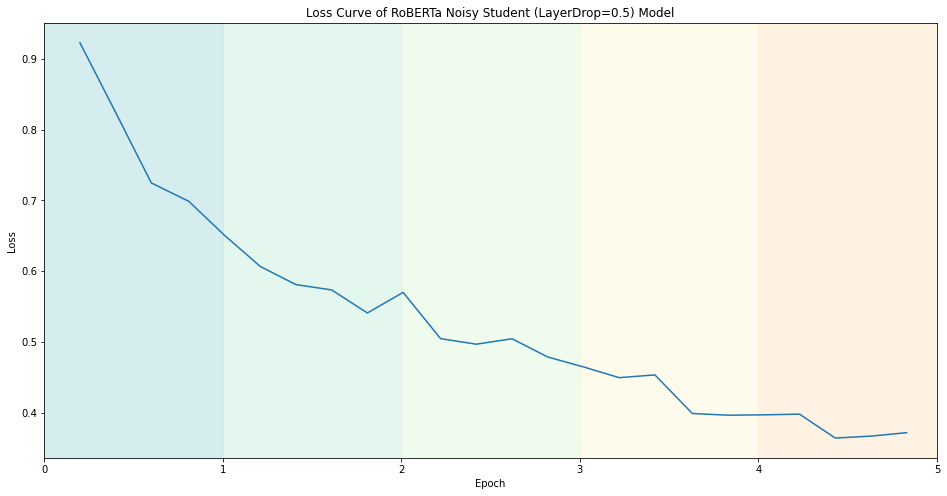

In [58]:
rob3Loss, rob3Train, rob3Eval = plot(logs[2], 0.5)

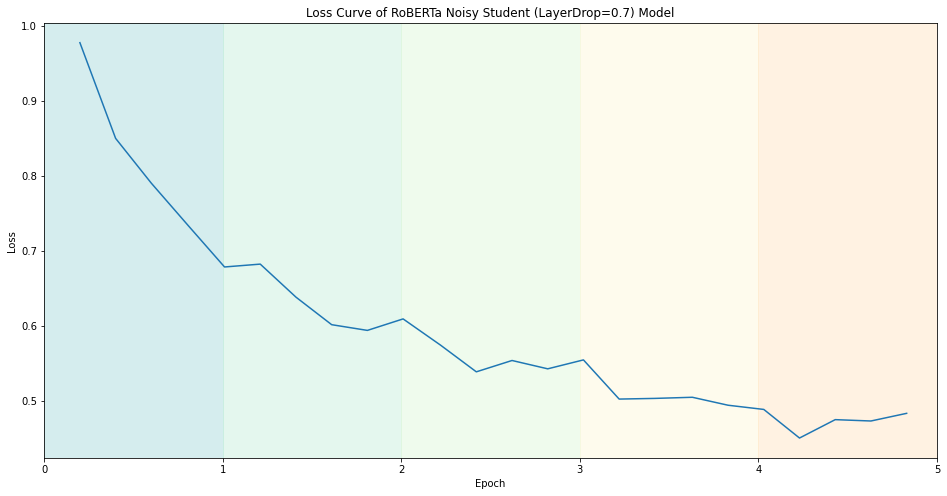

In [59]:
rob4Loss, rob4Train, rob4Eval = plot(logs[3], 0.7)

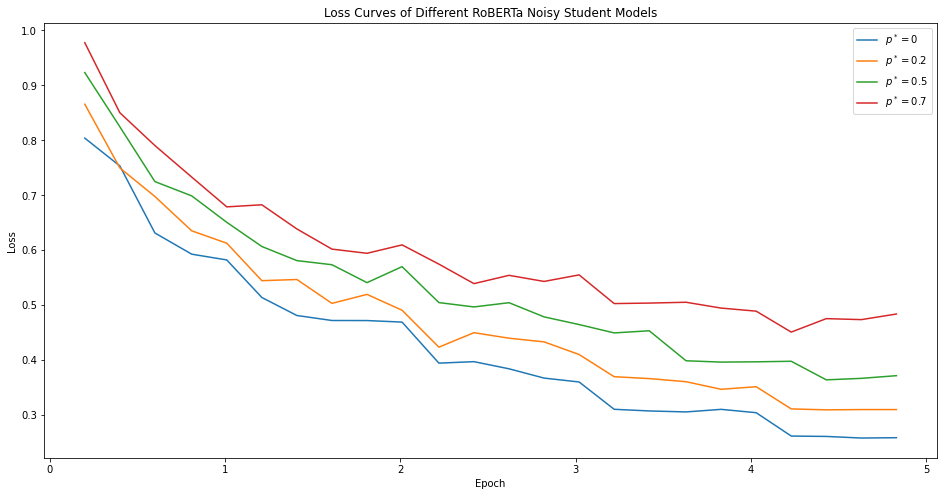

In [60]:
fig, ax = plt.subplots(figsize=(16, 8))
rob1Loss.plot(y="loss", x="epoch", label=f"$p^* = 0$", ax=ax)
rob2Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.2$", ax=ax)
rob3Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.5$", ax=ax)
rob4Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.7$", ax=ax)
_ = ax.set(ylabel="Loss", xlabel="Epoch", title="Loss Curves of Different RoBERTa Noisy Student Models") 

In [61]:
def evalCurves(col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$p^* = 0$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$p^* = 0.2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$p^* = 0.5$", ax=ax)
    rob4Eval.plot(y="eval_"+col, label=f"$p^* = 0.7$", ax=ax)
    _ = ax.set(ylabel="Evaluation "+label, xlabel="Epoch", title="Evaluation "+label+" (per Epoch) of Different RoBERTa Noisy Student Models")

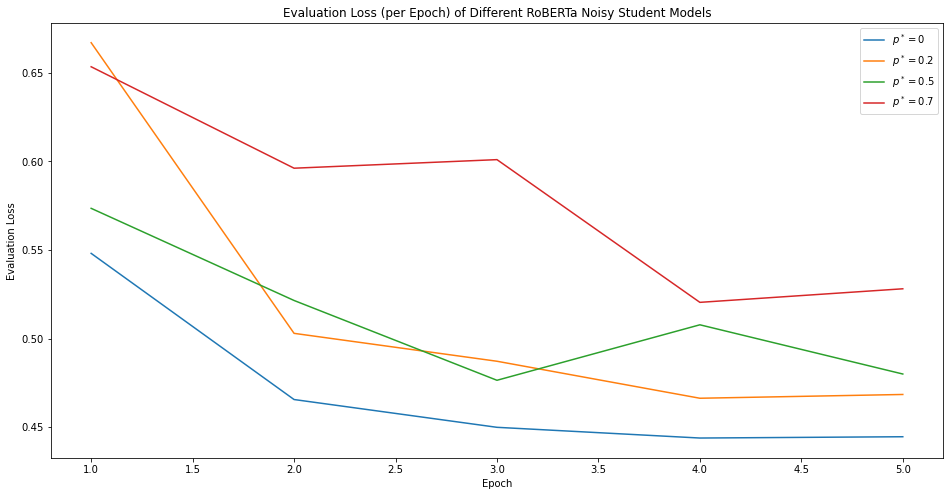

In [62]:
evalCurves("loss")

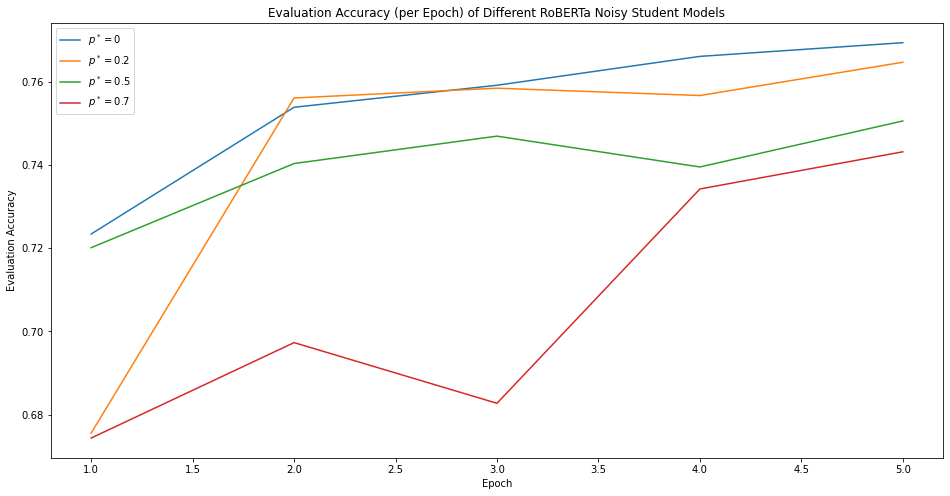

In [63]:
evalCurves("accuracy")

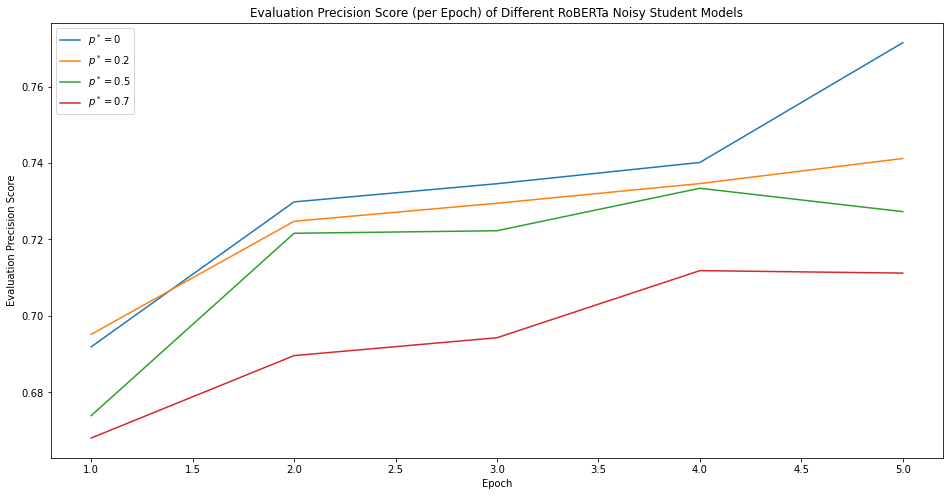

In [64]:
evalCurves("precision", score=True)

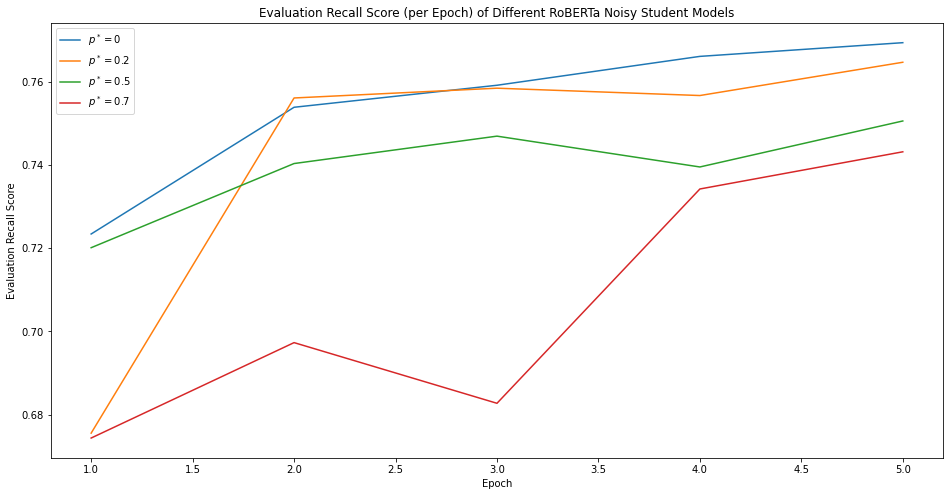

In [65]:
evalCurves("recall", score=True)

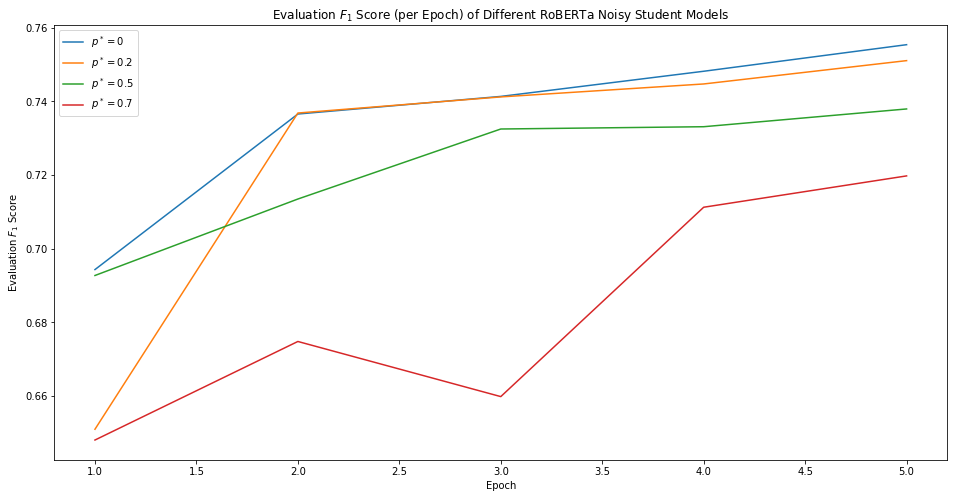

In [66]:
evalCurves("f1", "$F_1$", score=True)

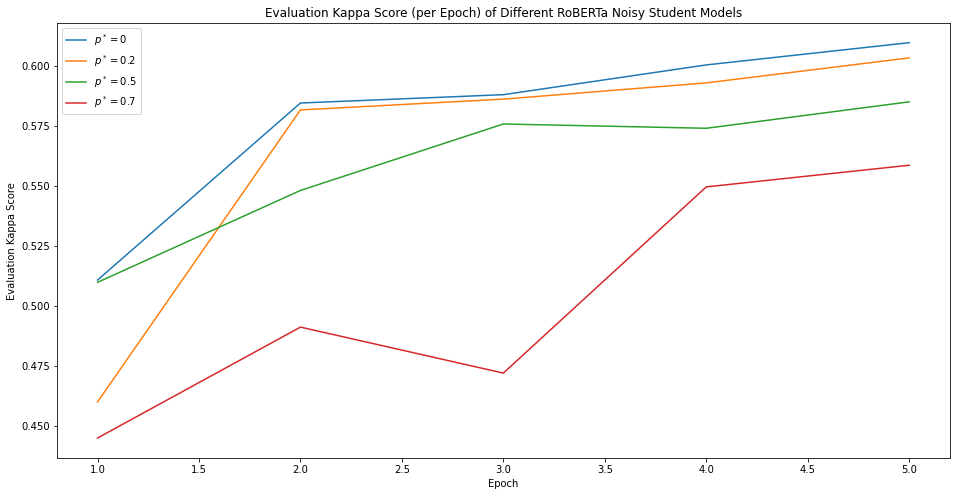

In [67]:
evalCurves("kappa", score=True)

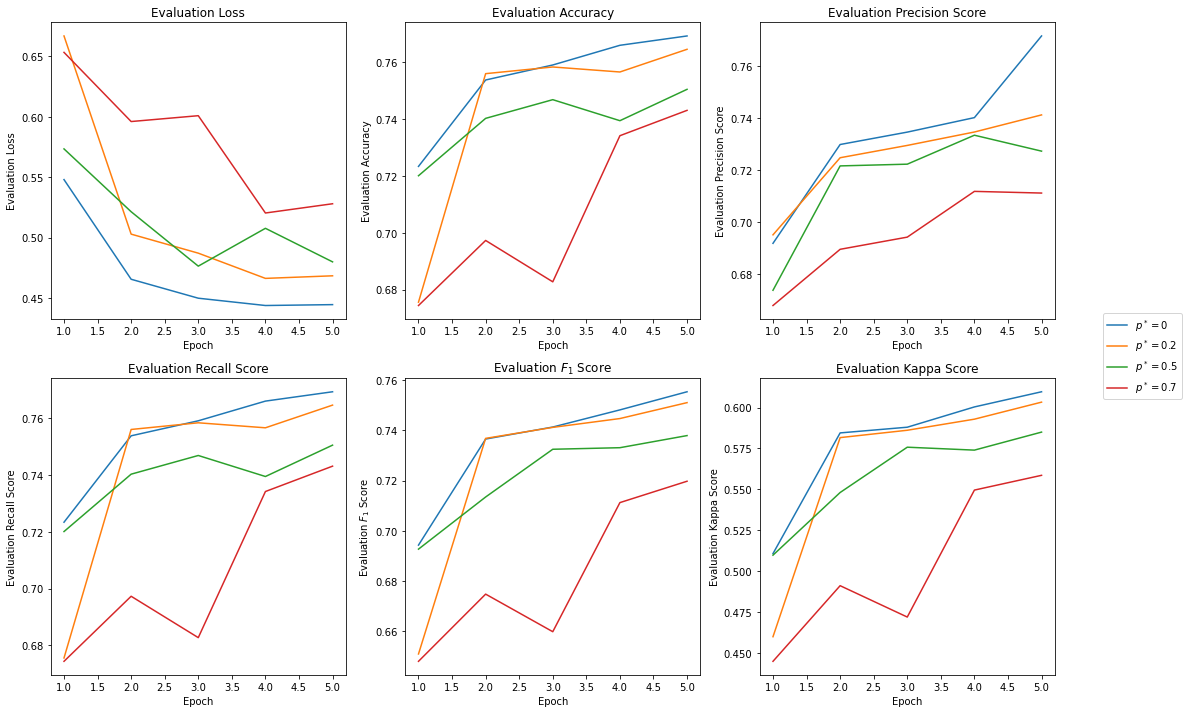

In [68]:
def evalCurves2(ax, col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    #fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$p^* = 0$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$p^* = 0.2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$p^* = 0.5$", ax=ax)
    rob4Eval.plot(y="eval_"+col, label=f"$p^* = 0.7$", ax=ax)
    _ = ax.set(ylabel="Evaluation "+label, xlabel="Epoch", title="Evaluation "+label)

fig, axes = plt.subplots(2, 3,figsize=(18,12))
evalCurves2(axes[0,0], "loss")
evalCurves2(axes[0,1], "accuracy")
evalCurves2(axes[0,2], "precision", score=True)
evalCurves2(axes[1,0], "recall", score=True)
evalCurves2(axes[1,1], "f1", "$F_1$", score=True)
evalCurves2(axes[1,2], "kappa", score=True)

handles, labels = axes[1,2].get_legend_handles_labels()
for i in range(2):
    for j in range(3):
        axes[i, j].get_legend().remove()
        
fig.legend(handles, labels, loc='center right')
#fig.suptitle("Evaluation Metrics (per Epoch) of Different Models")

In [71]:
modelTrain = pd.DataFrame({"$p^* = 0$":rob1Train, "$p^* = 0.2$":rob2Train, "$p^* = 0.5$":rob3Train, "$p^* = 0.7$":rob4Train}).T
modelTrain

,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
$p^* = 0$,2554.3119,38.864,4.858,1.172670e+16,0.420690
$p^* = 0.2$,2231.3265,44.489,5.562,1.156851e+16,0.467435
$p^* = 0.5$,1778.7411,55.809,6.977,1.217570e+16,0.525816
$p^* = 0.7$,1442.5738,68.815,8.603,1.206952e+16,0.592163


<AxesSubplot:title={'center':'Training Loss of Each Student Model'}>

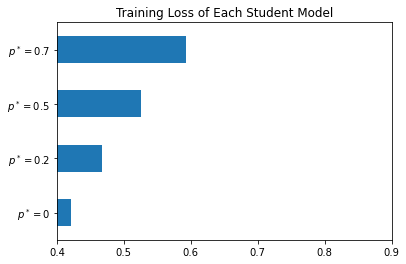

In [72]:
modelTrain.train_loss.plot.barh(xlim=(0.4, 0.9), title="Training Loss of Each Student Model")

<AxesSubplot:title={'center':'Training Runtime of Each Model'}>

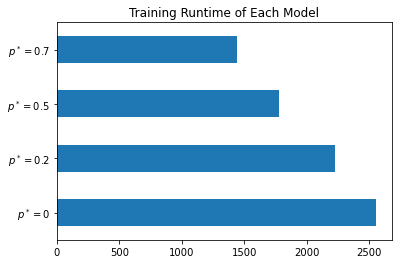

In [73]:
modelTrain.train_runtime.plot.barh(title="Training Runtime of Each Model")

In [74]:
def modelEval(func, name):
    df = pd.DataFrame({"$p^* = 0$":func(rob1Eval, axis=0), "$p^* = 0.2$":func(rob2Eval, axis=0), "$p^* = 0.5$":func(rob3Eval, axis=0), "$p^* = 0.7$":func(rob4Eval, axis=0)}).T
    fig, axes = plt.subplots(3, 2, figsize=(16,16))
    df.eval_loss.plot.barh(title=name+" Evaluation Loss for Each Model", ax=axes[0,0], xlim=(floor(df.eval_loss.min()*25)/25, ceil(df.eval_loss.max()*25)/25))
    df.eval_accuracy.plot.barh(title=name+" Evaluation Accuracy Score for Each Model", ax=axes[0,1], xlim=(floor(df.eval_accuracy.min()*25)/25, ceil(df.eval_accuracy.max()*25)/25))
    df.eval_precision.plot.barh(title=name+" Evaluation Precision Score for Each Model", ax=axes[1, 0], xlim=(floor(df.eval_precision.min()*25)/25, ceil(df.eval_precision.max()*25)/25))
    df.eval_recall.plot.barh(title=name+" Evaluation Recall Score for Each Model", ax=axes[1, 1], xlim=(floor(df.eval_recall.min()*25)/25, ceil(df.eval_recall.max()*25)/25))
    df.eval_f1.plot.barh(title=name+" Evaluation $F_1$ Score for Each Model", ax=axes[2,0], xlim=(floor(df.eval_f1.min()*25)/25, ceil(df.eval_f1.max()*25)/25))
    df.eval_kappa.plot.barh(title=name+" Evaluation Kappa Score for Each Model", ax=axes[2,1], xlim=(floor(df.eval_kappa.min()*25)/25, ceil(df.eval_kappa.max()*25)/25))
    plt.show()
    df.eval_runtime.plot.barh(title=name+" Evaluation Runtime for Each Model", figsize=(16, 8))


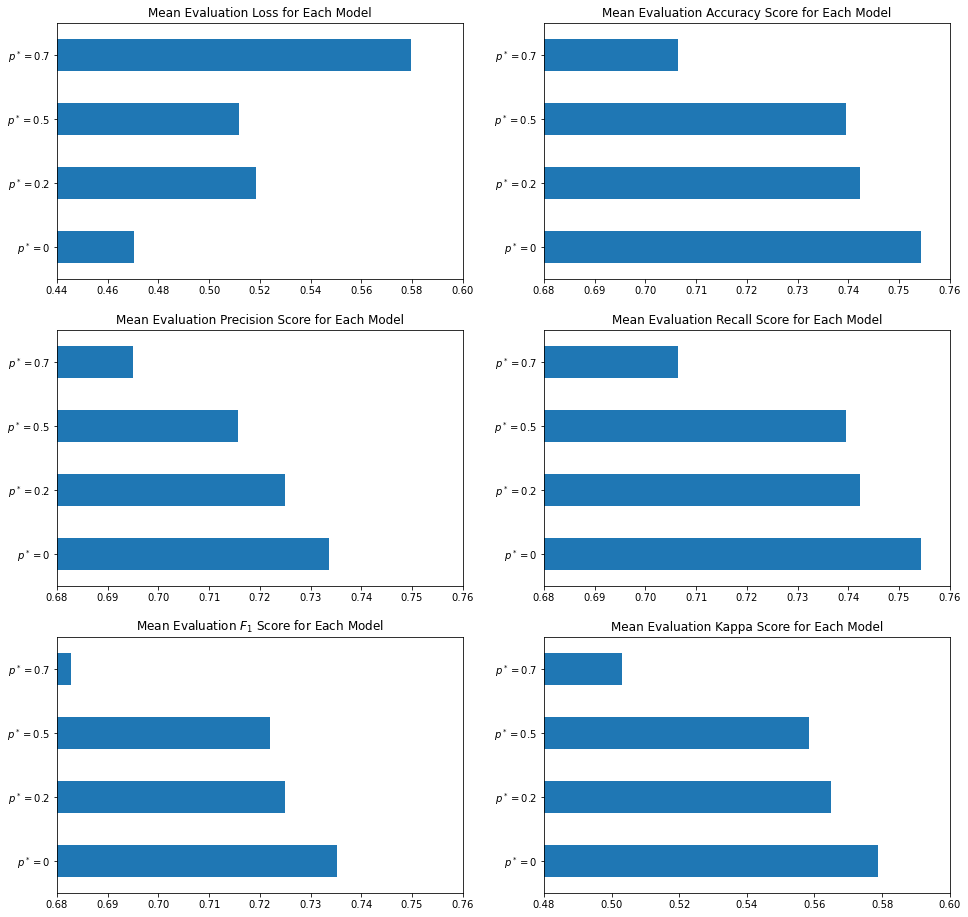

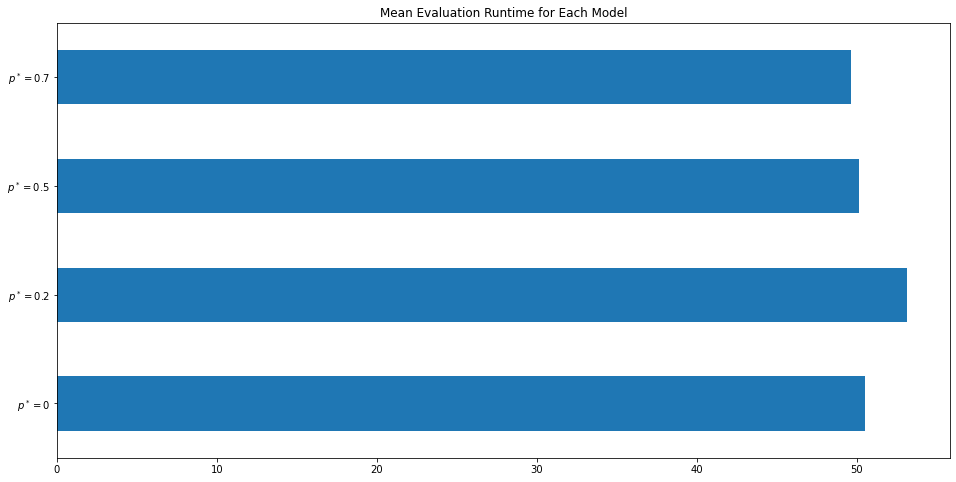

In [75]:
modelEval(np.mean, "Mean")

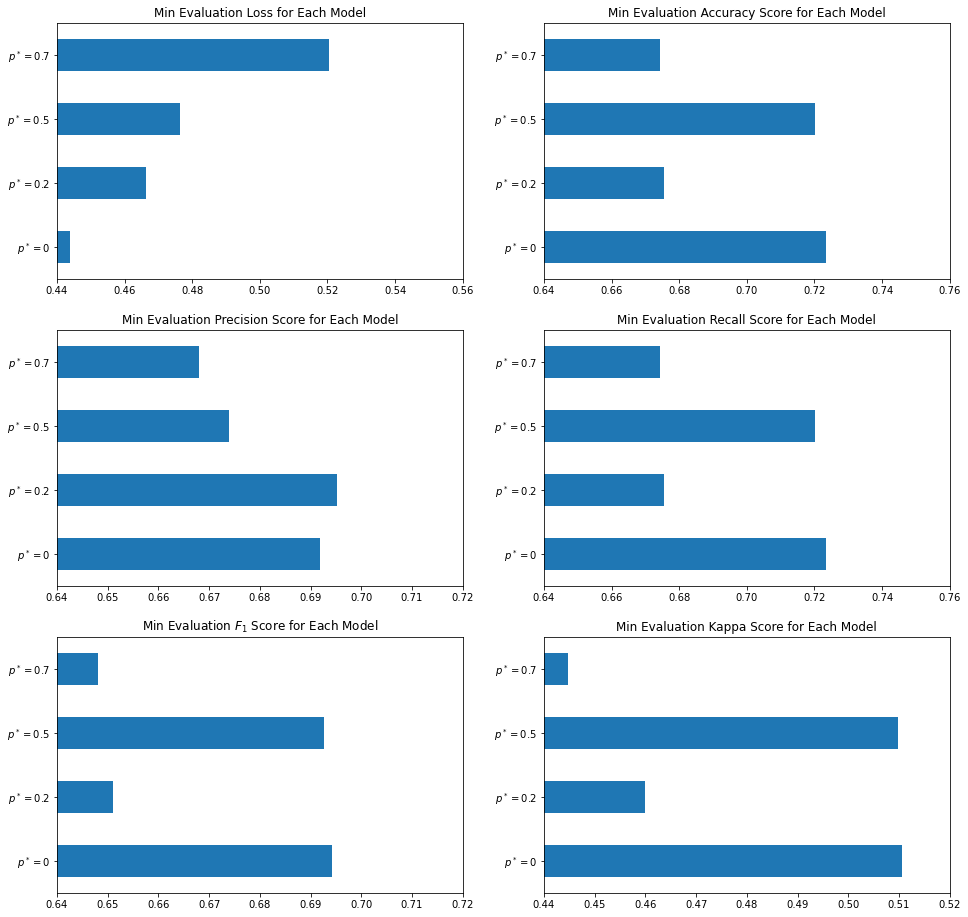

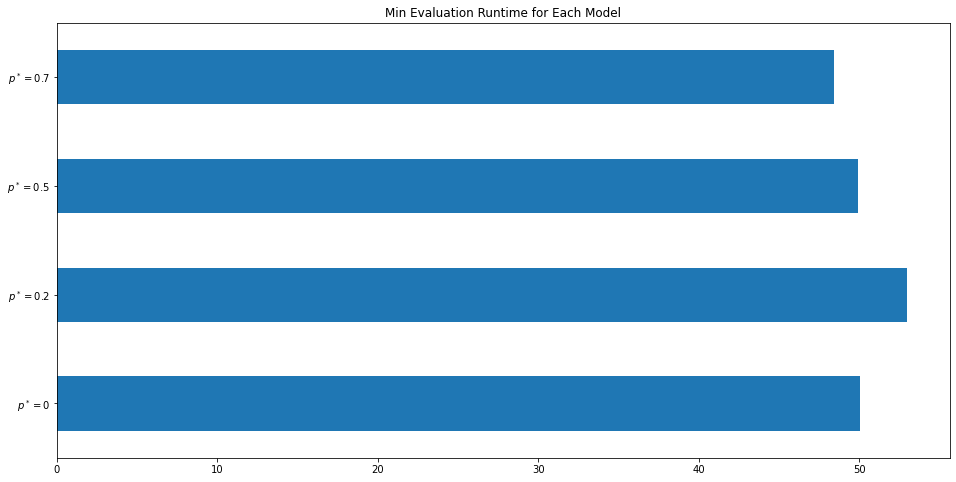

In [76]:
modelEval(np.min, "Min")

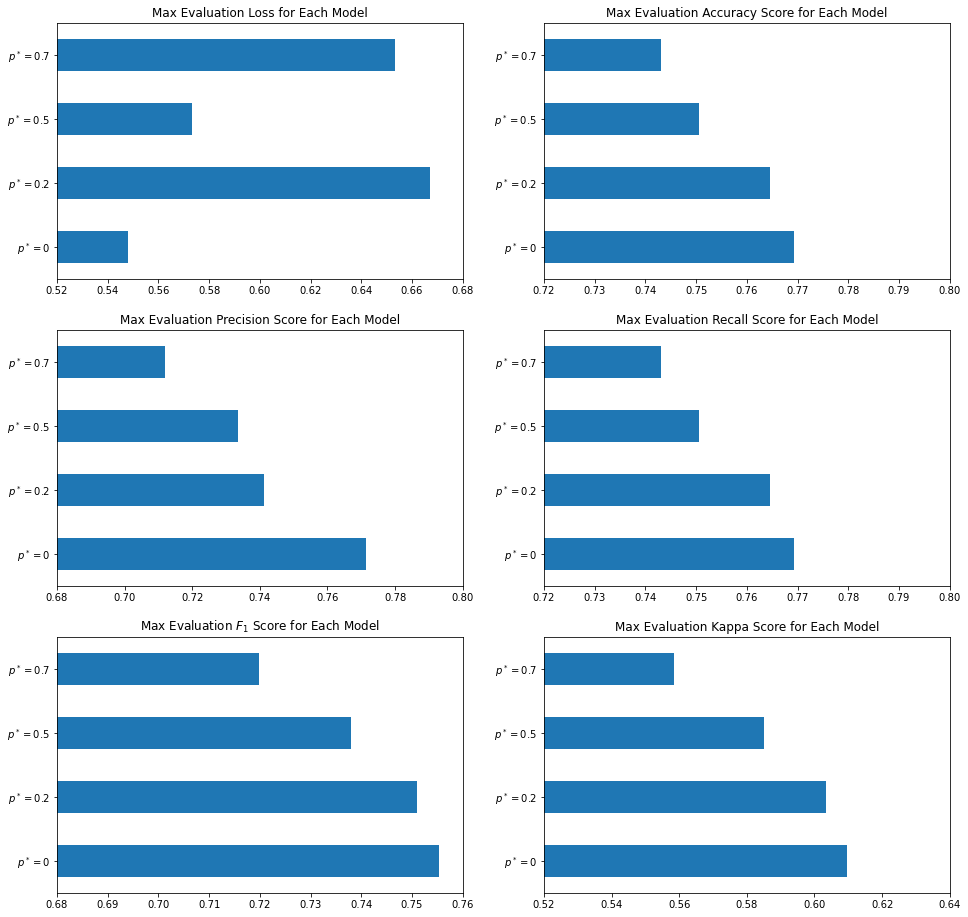

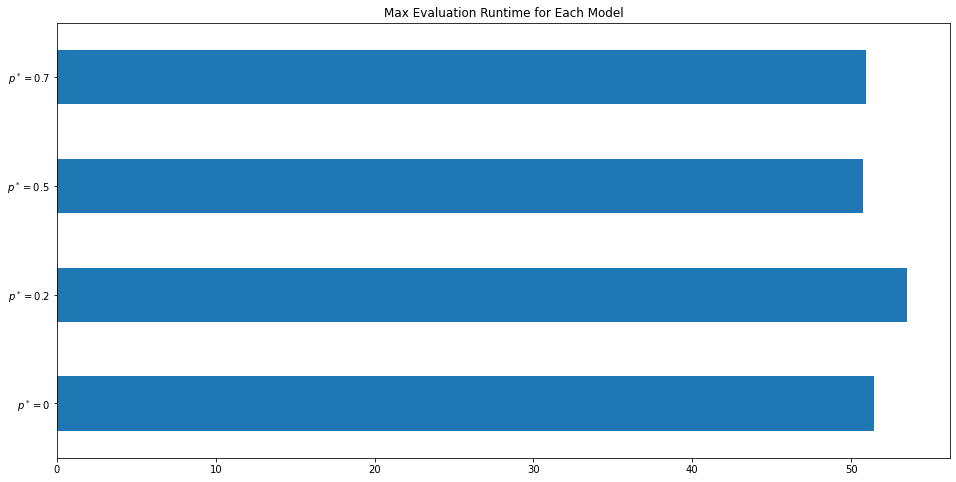

In [77]:
modelEval(np.max, "Max")